In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle,os
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras import regularizers, optimizers
import sys, os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Using TensorFlow backend.


In [2]:
#plt.rcParams['figure.figsize'] = [6.32, 5.11]
#plt.rcParams['figure.constrained_layout.use'] = True

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelpad'] = 15

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3

plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3

plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.markerscale'] = 1

plt.rcParams['lines.markersize'] = 9
plt.rcParams['lines.linewidth'] = 2

In [3]:
L = 40
samples_number = 10000
temperatures = np.arange(0.25, 4.01, 0.25)
dataset_size = 150000

In [11]:
data = pickle.load(open('Ising2DFM_reSample_L40_T=All.pkl','rb'))
X = np.unpackbits(data).astype(int).reshape(-1, L * L)
del data

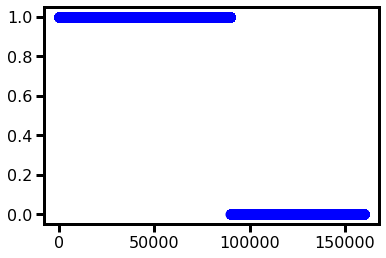

In [11]:
data_labels = pickle.load(open('Ising2DFM_reSample_L40_T=All_labels.pkl','rb'))

In [5]:
temp_val = np.hstack([np.repeat(temp, samples_number) for temp in temperatures])
train_idx = np.random.choice(X.shape[0], size=dataset_size, replace=False)

In [6]:
aux = np.arange(X.shape[0])
test_idx = np.asarray(list(set(aux).difference(set(train_idx))))

In [7]:
Y = np.zeros(temp_val.shape)
Y = np.where(temp_val < 2.2691, 1, Y)

In [8]:
x_train = X[train_idx]
y_label = Y[train_idx]
x_test = X[test_idx]
y_test = Y[test_idx]
del Y, X

In [9]:
x_train.shape

(150000, 1600)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], L, L, 1))

In [11]:
x_train.shape

(150000, 40, 40, 1)

In [12]:
#model = Sequential()

#model.add(Conv2D(filters=10, kernel_size=(5, 5), activation='sigmoid', input_shape=(L,L,1), 
#         data_format='channels_last'))

#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(filters=20, kernel_size=(5, 5), activation='sigmoid'))

#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.5))
          
#model.add(Flatten())

#model.add(Dense(80, activation='sigmoid'))
          
#model.add(Dropout(0.5))
          
#model.add(Dense(1, activation='softmax'))

In [13]:
model = Sequential()

model.add(Conv2D(filters=10, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='relu', input_shape=(L,L,1), 
         data_format='channels_last'))

#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(filters=20, kernel_size=(5, 5), activation='sigmoid'))

#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.5))
          
model.add(Flatten())

model.add(Dense(64, activation='relu'))
          
model.add(Dropout(0.5))
          
model.add(Dense(1, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

In [14]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 18, 18, 10)        260       
_________________________________________________________________
flatten_1 (Flatten)          (None, 3240)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                64820     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 65,101
Trainable params: 65,101
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x_train, y_label, validation_split=0.1, batch_size=64, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 135000 samples, validate on 15000 samples
Epoch 1/10
135000/135000 [==============================] - 6s 47us/step - loss: 6.6917 - accuracy: 0.5636 - val_loss: 6.8560 - val_accuracy: 0.5529
Epoch 2/10
135000/135000 [==============================] - 6s 41us/step - loss: 6.6917 - accuracy: 0.5636 - val_loss: 6.8560 - val_accuracy: 0.5529
Epoch 3/10
 61760/135000 [============>.................] - ETA: 2s - loss: 6.7003 - accuracy: 0.5630

KeyboardInterrupt: 

In [ ]:
Conv2D?